In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('https://raw.githubusercontent.com/upflairs-pvt-ltd/1st_june_data_science/master/customer_satisfaction/cust_satisfaction.csv')
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [3]:
df.shape

(103904, 12)

In [4]:
# duplicates checkout
df.duplicated().sum()

np.int64(172)

In [5]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [6]:
# deleting all those rows that containing missing values
df.dropna(inplace=True)


In [7]:
df.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [8]:
# macine learning algorithm does not acept alphabet column

In [9]:
female= df[df['Gender']=='Female']
male = df[df['Gender']=='Male']

In [10]:
female.shape , male.shape

((52576, 12), (51018, 12))

In [11]:
female

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
5,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,26,1180,1,4,1,0,0.0
7,Female,Loyal Customer,Business travel,Business,satisfied,52,2035,5,5,4,4,0.0
8,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,41,853,1,1,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103893,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,58,296,3,3,1,0,29.0
103895,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,24,1055,1,5,1,13,10.0
103897,Female,Loyal Customer,Business travel,Business,satisfied,60,1599,4,4,4,9,7.0
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0


In [12]:
female['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    30107
satisfied                  22469
Name: count, dtype: int64

In [13]:
male['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    28590
satisfied                  22428
Name: count, dtype: int64

In [14]:
female['Type of Travel'].value_counts()


Type of Travel
Business travel    36433
Personal Travel    16143
Name: count, dtype: int64

In [15]:
male['Type of Travel'].value_counts()

Type of Travel
Business travel    35032
Personal Travel    15986
Name: count, dtype: int64

In [16]:
female['Class'].value_counts()

Class
Business    24868
Eco         23776
Eco Plus     3932
Name: count, dtype: int64

In [17]:
male['Class'].value_counts()

Class
Business    24665
Eco         22817
Eco Plus     3536
Name: count, dtype: int64

In [18]:
female['Customer Type'].value_counts()

Customer Type
Loyal Customer       42336
disloyal Customer    10240
Name: count, dtype: int64

In [19]:

male['Customer Type'].value_counts()

Customer Type
Loyal Customer       42326
disloyal Customer     8692
Name: count, dtype: int64

<Axes: xlabel='Customer Type', ylabel='count'>

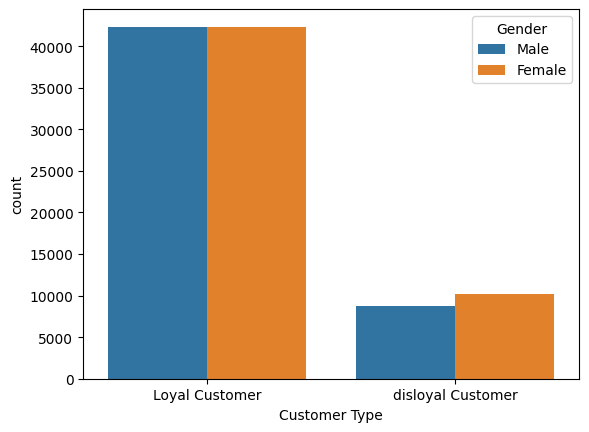

In [20]:
import matplotlib.pyplot as plt
sns.countplot(x="Customer Type",data=df, hue='Gender')

<Axes: xlabel='satisfaction', ylabel='count'>

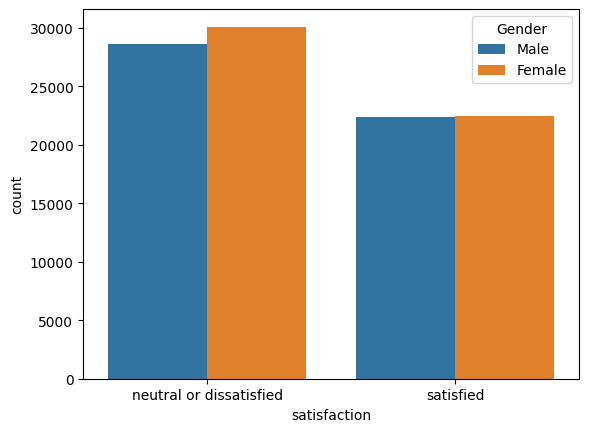

In [21]:
sns.countplot(x="satisfaction",data=df, hue='Gender')

<Axes: xlabel='Class', ylabel='count'>

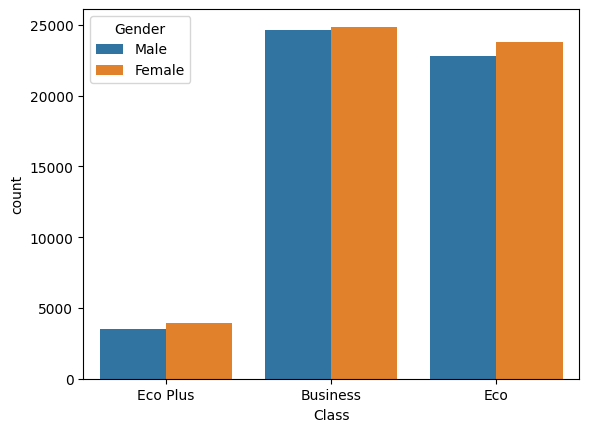

In [22]:
sns.countplot(x='Class',data=df,hue="Gender")

In [23]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


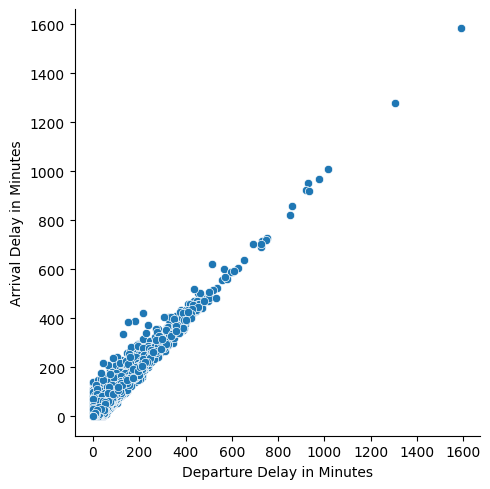

In [24]:
sns.relplot(x="Departure Delay in Minutes",y="Arrival Delay in Minutes",data=df)

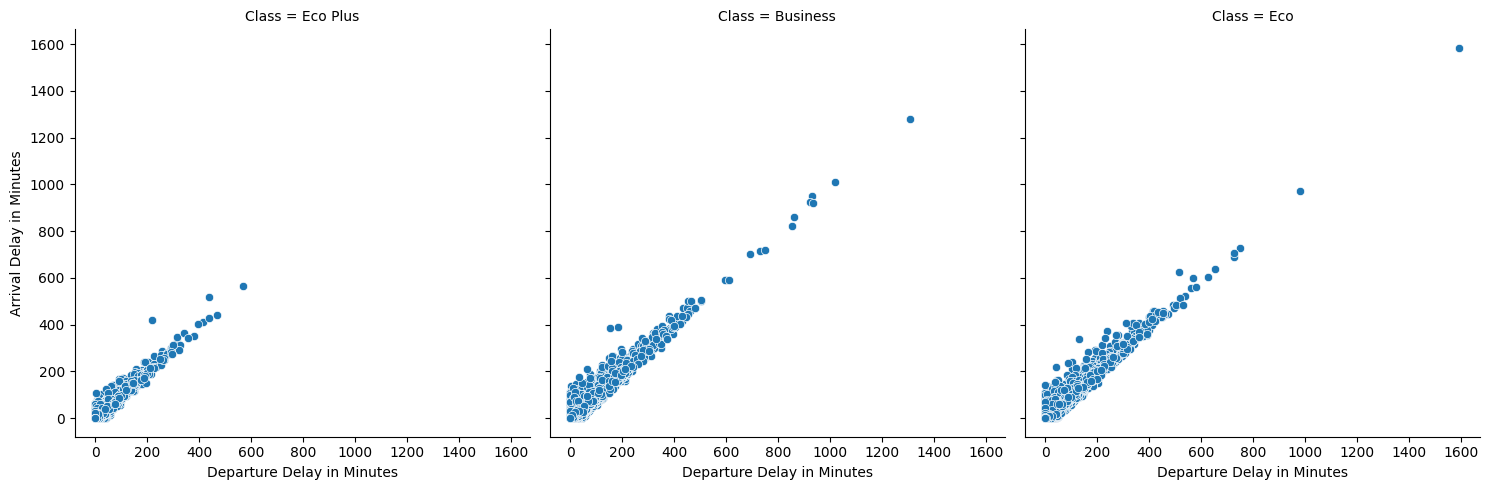

In [25]:
sns.relplot(x="Departure Delay in Minutes",y="Arrival Delay in Minutes",data=df,col="Class")

In [26]:

df['Class'].value_counts()

Class
Business    49533
Eco         46593
Eco Plus     7468
Name: count, dtype: int64

In [27]:
# x=[49533]
# y=[ 46593]
# plt.plot(x,y)
# plt.ylabel('x - axis')
# plt.xlabel('y - axis')
# plt.show()

In [28]:
df["Age"].min()

np.int64(7)

In [29]:
df['Age'].max()

np.int64(85)

<Axes: xlabel='Age', ylabel='Count'>

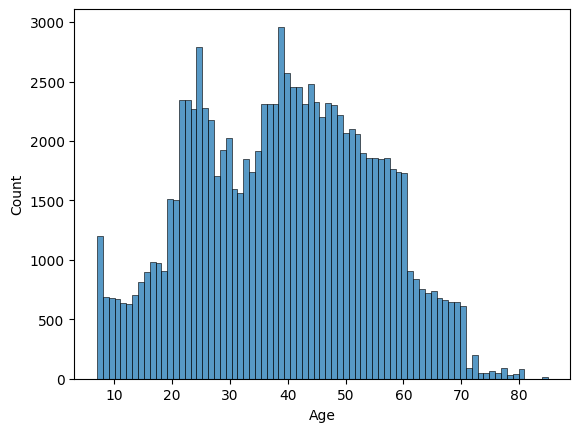

In [30]:
sns.histplot(df["Age"])

<Axes: xlabel='Age', ylabel='Count'>

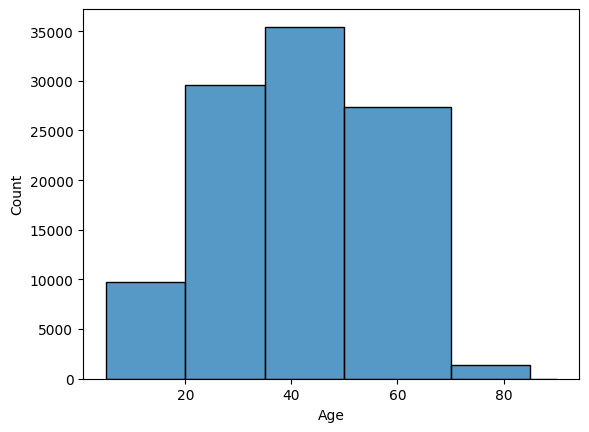

In [31]:
sns.histplot(df["Age"],bins=[5,20,35,50,70,85,90])


In [32]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


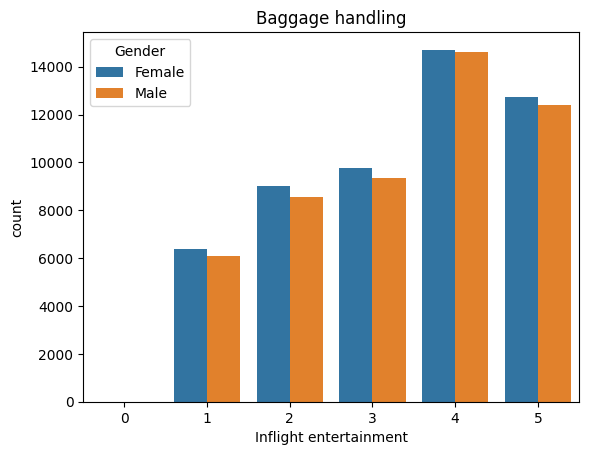

In [33]:
sns.countplot(x="Inflight entertainment", data=df, hue='Gender')
plt.title("Baggage handling")
plt.show()

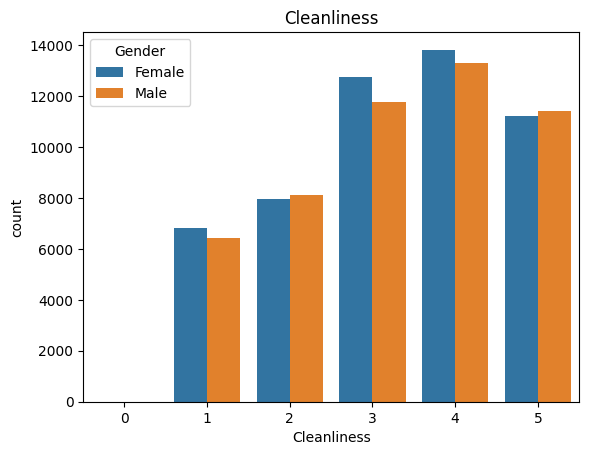

In [34]:
sns.countplot(x="Cleanliness", data=df, hue='Gender')
plt.title("Cleanliness")
plt.show()

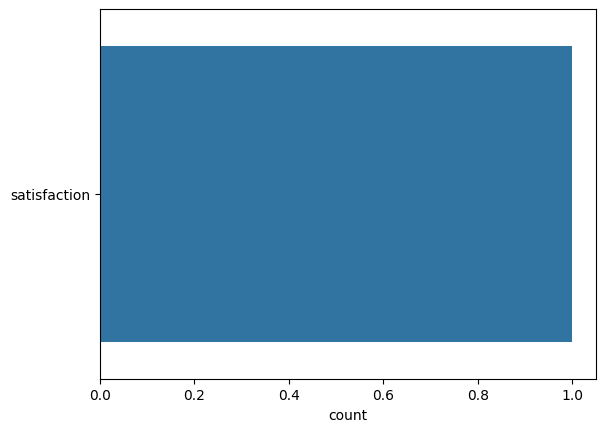

In [35]:
#### data balance or imbalance , check whenever we are making classification model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(['satisfaction'])
plt.show()


In [36]:
# use one hot encoder  to represent the data numerical
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder


In [37]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


In [38]:
# one hot encoding
import pandas as pd
pd.get_dummies(df)

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,13,460,5,4,5,25,18.0,False,True,True,False,False,True,False,False,True,True,False
1,25,235,1,3,1,1,6.0,False,True,False,True,True,False,True,False,False,True,False
2,26,1142,5,4,5,0,0.0,True,False,True,False,True,False,True,False,False,False,True
3,25,562,2,3,2,11,9.0,True,False,True,False,True,False,True,False,False,True,False
4,61,214,3,4,3,0,0.0,False,True,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,4,2,3,0.0,True,False,False,True,True,False,False,True,False,True,False
103900,49,2347,5,5,4,0,0.0,False,True,True,False,True,False,True,False,False,False,True
103901,30,1995,4,4,4,7,14.0,False,True,False,True,True,False,True,False,False,True,False
103902,22,1000,1,1,1,0,0.0,True,False,False,True,True,False,False,True,False,True,False


In [39]:

pd.get_dummies(df,drop_first="if_binary").astype(int)

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,5,4,5,25,18,1,0,1,0,1,0
1,25,235,1,3,1,1,6,1,1,0,0,0,0
2,26,1142,5,4,5,0,0,0,0,0,0,0,1
3,25,562,2,3,2,11,9,0,0,0,0,0,0
4,61,214,3,4,3,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,4,2,3,0,0,1,0,1,0,0
103900,49,2347,5,5,4,0,0,1,0,0,0,0,1
103901,30,1995,4,4,4,7,14,1,1,0,0,0,0
103902,22,1000,1,1,1,0,0,0,1,0,1,0,0


In [40]:
df2=pd.get_dummies(df,drop_first="if_binary").astype(int)
df2.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,5,4,5,25,18,1,0,1,0,1,0
1,25,235,1,3,1,1,6,1,1,0,0,0,0
2,26,1142,5,4,5,0,0,0,0,0,0,0,1
3,25,562,2,3,2,11,9,0,0,0,0,0,0
4,61,214,3,4,3,0,0,1,0,0,0,0,1


In [41]:
df2.isnull().sum()

Age                                0
Flight Distance                    0
Inflight entertainment             0
Baggage handling                   0
Cleanliness                        0
Departure Delay in Minutes         0
Arrival Delay in Minutes           0
Gender_Male                        0
Customer Type_disloyal Customer    0
Type of Travel_Personal Travel     0
Class_Eco                          0
Class_Eco Plus                     0
satisfaction_satisfied             0
dtype: int64

In [42]:
# xand y split , independent and dependent variable
x=df2.drop("satisfaction_satisfied", axis='columns') # independent variable
y=df2[['satisfaction_satisfied']] # target variable


In [43]:
# training and testing split  
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [44]:
from sklearn.linear_model import LogisticRegression


In [45]:
lgr=LogisticRegression()

In [46]:
y_train.values.ravel()

array([0, 0, 1, ..., 0, 0, 0])

In [47]:
import warnings  #use to ignore the warning 
warnings.filterwarnings('ignore')

In [48]:
lgr.fit(x_train,y_train)





LogisticRegression()

In [49]:
print("Traning score:",lgr.score(x_train,y_train)*100)
print("testing score: ",lgr.score(x_test,y_test))

Traning score: 79.54147812971343
testing score:  0.7997007577585791


In [50]:
pred=lgr.predict(x_test)

In [51]:
x_test.shape

(20719, 12)

In [52]:
pred

array([1, 1, 0, ..., 0, 1, 1])

In [53]:
y_test['prediction']=pred 

In [54]:
# model evaluation technique


In [55]:
y_test.head(40)

,satisfaction_satisfied,prediction
96220,0,1
20738,1,1
56497,0,0
44493,1,0
30540,1,1
43482,0,0
1066,1,1
2031,0,0
63513,0,1
27117,0,0


In [56]:
y_test.shape

(20719, 2)

In [57]:
from sklearn.metrics import confusion_matrix,classification_report

In [58]:
## confusion_matrix(actual,prediction)
matrix = confusion_matrix(y_test['satisfaction_satisfied'],y_test['prediction'])
matrix

array([[9682, 2179],
       [1971, 6887]])

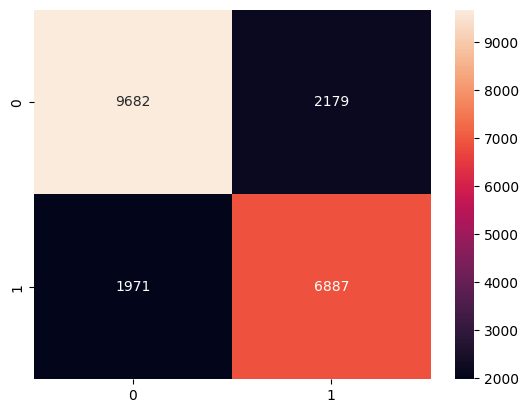

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report

sns.heatmap(matrix,annot=True,fmt='d')
plt.show()

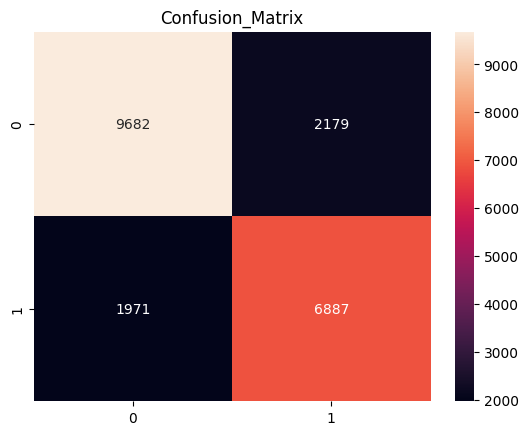

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

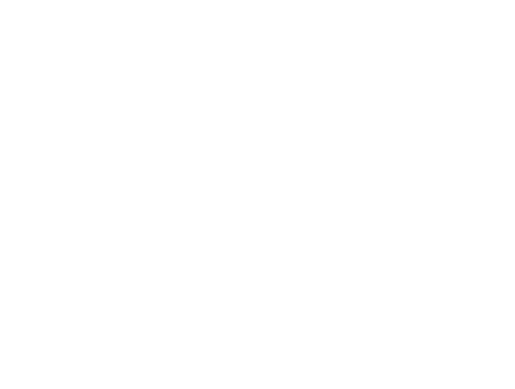

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report

sns.heatmap(matrix,annot=True,fmt='d')
plt.title('Confusion_Matrix')
plt.show()
plt.axis("off")

In [61]:
import os, joblib
os.makedirs('models',exist_ok=True)
joblib.dump(lgr,'./models/logisticregre.lb')
print('your model is saved!')

your model is saved!


In [62]:
print(classification_report(y_test['satisfaction_satisfied'],y_test['prediction']))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82     11861
           1       0.76      0.78      0.77      8858

    accuracy                           0.80     20719
   macro avg       0.80      0.80      0.80     20719
weighted avg       0.80      0.80      0.80     20719



In [63]:
x_train.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
71455,60,2249,4,4,2,0,0,1,0,0,0,0
65481,41,404,1,1,2,9,2,1,0,0,0,0
16493,24,3073,5,4,5,0,0,1,0,0,0,0
91156,42,3523,4,4,4,0,0,0,0,0,0,0
18766,55,1162,5,5,3,2,19,0,0,0,0,0


In [64]:
x_train.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
71455,60,2249,4,4,2,0,0,1,0,0,0,0
65481,41,404,1,1,2,9,2,1,0,0,0,0
16493,24,3073,5,4,5,0,0,1,0,0,0,0
91156,42,3523,4,4,4,0,0,0,0,0,0,0
18766,55,1162,5,5,3,2,19,0,0,0,0,0


<h> ** try the same project of cuatomer satisfaction  with decisontree and randomfores

In [65]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor


In [66]:
dtc=DecisionTreeClassifier()
rdf=RandomForestClassifier()

In [67]:
### training the algorithm 
dtc.fit(x_train,y_train)
rdf.fit(x_train,y_train)
print("alogorithm is trained")

alogorithm is trained


In [68]:
print("Decision tree score ") 
print("Training score : ",dtc.score(x_train,y_train) )
print("Testing score : " ,dtc.score(x_test,y_test['satisfaction_satisfied']))

print("Random forest score")
print("Training score : ",rdf.score(x_train,y_train) )
print("Testing score : " ,rdf.score(x_test,y_test['satisfaction_satisfied']))

Decision tree score 
Training score :  0.9997466063348416
Testing score :  0.8167865244461605
Random forest score
Training score :  0.9996983408748115
Testing score :  0.8749457020126454


In [69]:
import os, joblib
os.makedirs('models',exist_ok=True)
joblib.dump(dtc,'./models/decisiontree.lb')
joblib.dump(rdf,'./models/randomforest.lb')
print('your model is saved!')

your model is saved!


<h>**** hyperparamenter tunning to change the overwidth 

In [70]:
rdf2=RandomForestClassifier(max_depth=14,min_samples_split=40,n_estimators=85)

In [71]:
print("Random forest score")
print("Training score : ",rdf.score(x_train,y_train)*100 )
print("Testing score : " ,rdf.score(x_test,y_test['satisfaction_satisfied']))

Random forest score
Training score :  99.96983408748115
Testing score :  0.8749457020126454


In [74]:
# hyperparameter turing 
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rdf3 = RandomForestClassifier()

In [75]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
parameters = {'n_estimators':[85,95,120,155],
                'max_depth':[10, 15,20,25],
              'min_samples_split':[40,30,50]}


gridsearchcv = GridSearchCV(estimator=rdf3,param_grid=parameters)

In [76]:
gridsearchcv.fit(x_train, y_train) ## now again training the algorithm as per hypertuning 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, 20, 25],
                         'min_samples_split': [40, 30, 50],
                         'n_estimators': [85, 95, 120, 155]})

In [77]:
gridsearchcv.best_params_

{'max_depth': 20, 'min_samples_split': 50, 'n_estimators': 120}